<a href="https://colab.research.google.com/github/Mathu1404/data_science/blob/main/handwrittenprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HAND WRITTEN DIGIT PREDICTION**

**OBJECTIVE**

To develop a system to accurately recognize and classify handwritten digits (0-9) from images.

1.  Data Collection: Obtain and prepare a dataset of handwritten digits (e.g., MNIST).
2.  Data Preprocessing: Normalize and prepare images for model input.
3.  Model Selection: Choose and train a machine learning or deep learning model.
4. Model Evaluation: Assess accuracy and performance on test data

IMPORT LIBRARIES

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

IMPORT DATA

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df=load_digits()

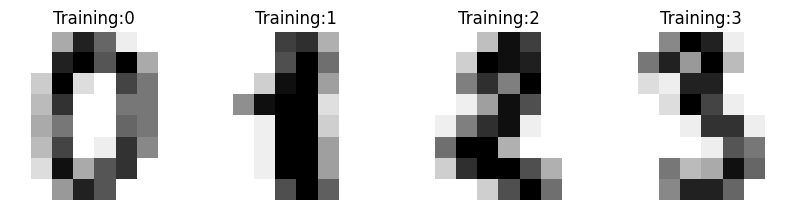

In [ ]:
_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training:%i" %label)


DATA PREPROCESSING

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

SCALING IMAGE DATA

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data=data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

TRAIN TEST SPLIT DATA

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

PREDICT TEST DATA

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
y_pred

array([2, 4, 2, 7, 4, 0, 0, 4, 9, 7, 6, 5, 9, 6, 7, 0, 0, 1, 7, 9, 5, 6,
       7, 7, 7, 5, 3, 4, 3, 9, 8, 4, 9, 5, 1, 7, 4, 2, 4, 6, 9, 7, 8, 0,
       0, 6, 1, 0, 9, 5, 2, 1, 2, 2, 2, 0, 0, 4, 3, 0, 5, 8, 4, 4, 2, 2,
       0, 7, 9, 0, 0, 7, 3, 5, 3, 3, 4, 1, 5, 9, 3, 3, 1, 8, 7, 7, 2, 6,
       2, 5, 9, 8, 0, 7, 2, 4, 7, 7, 9, 7, 2, 6, 6, 8, 5, 5, 3, 1, 6, 5,
       6, 1, 4, 7, 5, 8, 2, 8, 8, 5, 4, 9, 5, 9, 0, 4, 5, 9, 8, 1, 3, 7,
       2, 7, 7, 3, 7, 0, 0, 9, 7, 7, 3, 2, 8, 7, 5, 2, 0, 7, 8, 9, 4, 3,
       1, 5, 3, 9, 7, 2, 1, 7, 6, 7, 8, 8, 3, 8, 2, 7, 1, 0, 6, 6, 3, 4,
       5, 8, 3, 9, 0, 2, 3, 0, 1, 0, 9, 2, 9, 6, 1, 6, 8, 5, 9, 1, 7, 6,
       2, 7, 3, 1, 9, 3, 2, 0, 4, 4, 3, 2, 8, 8, 0, 0, 2, 6, 6, 5, 9, 4,
       4, 5, 4, 3, 9, 2, 9, 9, 5, 1, 6, 0, 5, 6, 7, 9, 4, 3, 1, 1, 2, 8,
       8, 7, 2, 5, 4, 3, 9, 9, 1, 2, 6, 7, 4, 9, 5, 1, 9, 3, 1, 5, 7, 6,
       0, 0, 1, 3, 6, 9, 1, 7, 1, 0, 6, 0, 7, 8, 3, 7, 9, 3, 1, 5, 1, 2,
       0, 1, 2, 5, 4, 1, 4, 6, 1, 0, 6, 8, 8, 3, 6,

MODEL ACCURACY

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[53,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  0, 45,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1, 58,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  1,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  0,  0],
       [ 0,  1,  0,  0,  1,  1,  0,  2, 49,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 53]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.98      1.00      0.99        54
           2       1.00      0.98      0.99        56
           3       0.98      0.94      0.96        48
           4       0.92      0.96      0.94        47
           5       0.95      0.94      0.94        62
           6       0.98      0.98      0.98        49
           7       0.91      1.00      0.95        60
           8       1.00      0.91      0.95        54
           9       0.95      0.95      0.95        56

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

